In [9]:
import numpy
from matplotlib import pylab

fin_eq14_gc=numpy.load("/rds/project/bn204/rds-bn204-asterics/jck42/BiSpectrum/Binned_Data_LargeField/EQ14/XX/lst0900_1000.npz")
fin_eq14_fa=numpy.load("/rds/project/bn204/rds-bn204-asterics/jck42/BiSpectrum/Binned_Data_LargeField/EQ14/XX/fornaxA.npz")
fin_eq14_0230_0600=numpy.load("/rds/project/bn204/rds-bn204-asterics/jck42/BiSpectrum/Binned_Data_LargeField/EQ14/XX/lst_0230_1000.npz")
cl_gc = fin_eq14_gc['closures']
cl_fa = fin_eq14_fa['closures']
cl_big = fin_eq14_0230_0600['closures']

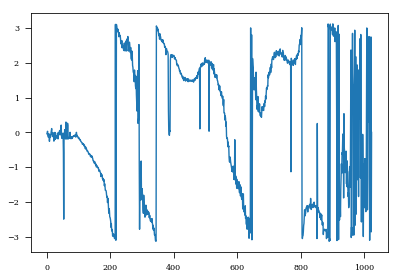

In [10]:
import matplotlib.pyplot as plt
xvar = numpy.arange(1024)

plt.plot(xvar,cl_big[450,10,20,:])

In [11]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [12]:
%run procps.py
%run plotprelude.py

In [13]:
%%cython -a
import numpy

def cmedn_c(a, axis, n):
    """Circular MEDian N

    Returns n values around the median computed along axis using
    circular stats. NB values are not necessarily sorted in distance
    from median (argpartition is used)
    """
    p=a[numpy.newaxis, :]-a[:, numpy.newaxis]
    p=(p+numpy.pi) % (2 * numpy.pi) - numpy.pi
    p = numpy.abs(p).sum(1)
    ii=numpy.argpartition(p, n+1, axis=axis)
    return numpy.choose(ii[0:n], a)

def mdays_c(dc, n):
    """Median across Days

    Compute cmedn across the days axis. Needed because cmedn is N^2
    memory scaling
    """
    dnew=numpy.array([[cmedn_c(dc[i,:,j], axis=0, n=n) for j in range(dc.shape[2])] for i in range(dc.shape[0])])
    # Rotate axes so days are in position 1 again
    return numpy.moveaxis(dnew, 2, 1)

In [ ]:
print(cl_gc.shape)
print(cl_fa.shape)
print(cl_big.shape)

In [ ]:
#Medians for Equilateral 14m triads
pp_gc_1=mdays_c(cl_gc[:,0:22], 1)
pp_gc_2=mdays_c(cl_gc[:,22:], 1)

In [ ]:
pp_fa_1=mdays_c(cl_fa[:,0:22], 1)
pp_fa_2=mdays_c(cl_fa[:,22:], 1)

In [ ]:
pp_all_1=mdays_c(cl_big[:,0:22], 1)
pp_all_2=mdays_c(cl_big[:,22:], 1)

In [ ]:
pp_gc=numpy.concatenate((pp_gc_1, pp_gc_2), axis=1)     
pp_fa=numpy.concatenate((pp_fa_1, pp_fa_2), axis=1)
pp_all=numpy.concatenate((pp_all_1, pp_all_2), axis=1)

# YY Polarisations

In [ ]:
#x1=psXmedCTimCTri(numpy.exp(1j*(pp_gc[:,:,:,120:380])),
#                       window="hamming")
#pp_ps(x1,title="EQ14, XX, Times 150:550, Chans 120:380")
#x1=psXmedCTimCTri(numpy.exp(1j*(pp_fa[:,:,:,120:380])),
#                       window="hamming")
#pp_ps(x1,title="EQ14, XX, Times 200:400, Chans 120:380")
x1=psXmedCTimCTri(numpy.exp(1j*(pp_all[250:350,:,:,120:380])),
                       window="hamming")
pp_ps(x1,title="EQ14, XX, Large Field")

x2=psXmedCTimCTriRaw(numpy.exp(1j*(pp_gc[:,:,:,120:380])),
                       window="hamming")
x3=psXmedCTimCTriRaw(numpy.exp(1j*(pp_fa[:,:,:,120:380])),
                       window="hamming")
xc=numpy.vstack((x2,x3))
print(xc.shape)
x3 = numpy.fft.fftshift(numpy.abs(numpy.mean(xc,axis=0)))/128
pp_ps(x3,title="EQ14, YY, Fornax and Galactic Centre Averaged")

# Diagnosing Power Spectra as function of LST

In [ ]:
last_i = 0
xvar
for i in numpy.arange(10,cl_big.shape[0],10):
    
    
    
    x1=psXmedCTimCTri(numpy.exp(1j*(pp_all[last_i:i,:,:,120:380])),
                       window="hamming")
    pp_ps(x1,title="EQ14, XX, Large Field")
    last_i=i